In [60]:
# use of perceptron 
#SHAMIEL
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# try to read the file faster
def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']



train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

# i decided to work with a smaller training set(due to limited hardware) 40k
train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]


train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

#PCA -> reduce the dimensionality(reduce computation complexity)

pca = PCA(n_components= 60, random_state= 0)
pca.fit_transform(train_images)
pca.transform(test_images)

perceptron = Perceptron(random_state=0, max_iter=1000,early_stopping=True)

perceptron.fit(train_images,train_label)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=True, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [33]:
#https://github.com/rois-codh/kmnist, it was recommended by the people involved to use this to get the accuracy of 
# the result
#SHAMIEL

def results(test_label,y_predicition):
    accs = []
    for cls in range(49):
        mask = (test_label == cls)
        cls_acc = (y_prediction == cls)[mask].mean() 
        accs.append(cls_acc) 
    accs = np.mean(accs)
    return accs

In [62]:
y_prediction = perceptron.predict(test_images) 

In [63]:
print("Accuracy score: ", results(test_label,y_prediction))

Accuracy score:  0.34956456900120725


Text(452.78000000000003, 0.5, 'true value')

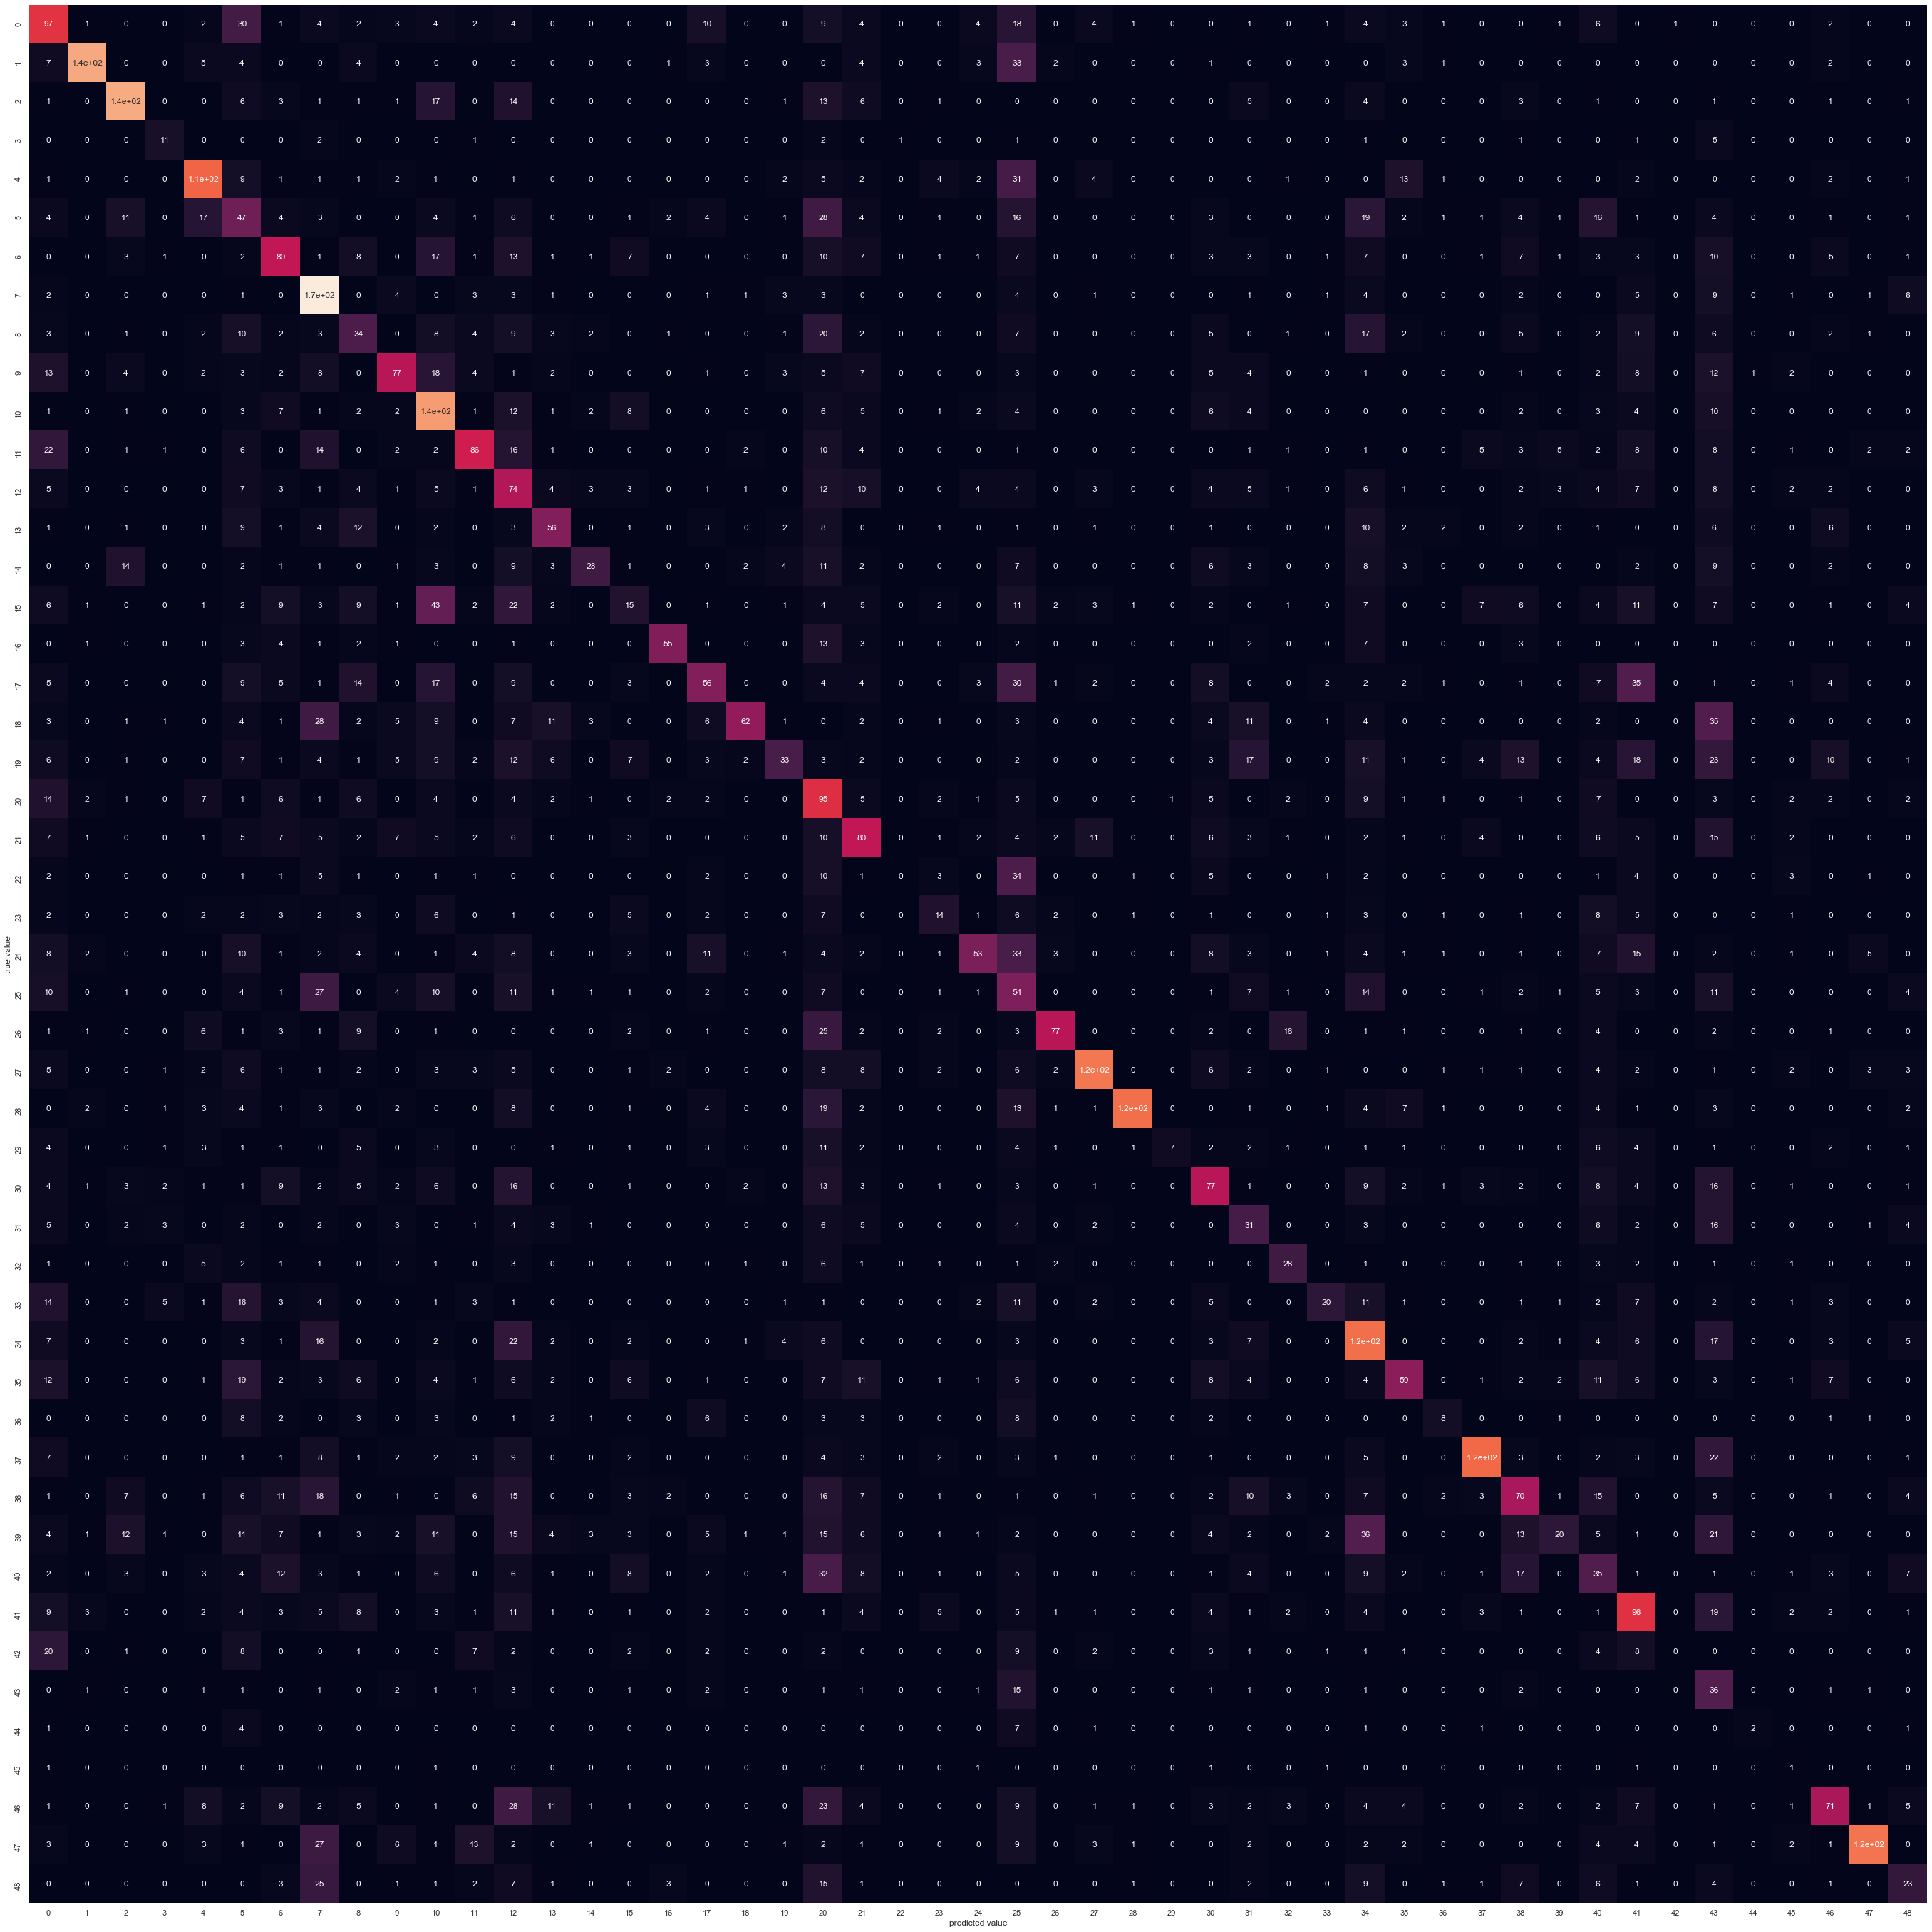

In [64]:
cm = confusion_matrix(test_label,y_prediction)
plt.figure(figsize=(49,49))
#plot_confusion_matrix(mat,class_name)
#here seaborn is used for this larger confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#SHAMIEL

f1 = f1_score(test_label,y_prediction,average='micro')
print(f1)
precision = precision_score(test_label,y_prediction,average='micro')
print(precision)
recall = recall_score(test_label,y_prediction,average='micro')
print(recall)

print(classification_report(test_label,y_prediction))

0.3825
0.3825
0.3825
              precision    recall  f1-score   support

           0       0.30      0.44      0.36       220
           1       0.89      0.66      0.76       213
           2       0.67      0.64      0.65       222
           3       0.38      0.42      0.40        26
           4       0.59      0.57      0.58       201
           5       0.16      0.23      0.19       208
           6       0.37      0.39      0.38       206
           7       0.41      0.75      0.53       226
           8       0.21      0.21      0.21       162
           9       0.55      0.41      0.47       189
          10       0.36      0.61      0.45       223
          11       0.55      0.42      0.47       207
          12       0.18      0.39      0.25       191
          13       0.46      0.41      0.43       136
          14       0.58      0.23      0.33       122
          15       0.16      0.08      0.10       196
          16       0.81      0.56      0.66        98
      

In [ ]:
# this will take some time -> be prepared
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import cross_val_score

#SHAMIEL
#K_NEIGHBORS
def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']


train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

# i decided to work with a smaller training set(due to limited hardware)
train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]

train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

#PCA -> reduce the dimensionality(reduce computation complexity)

pca = PCA(n_components= 60, random_state= 0)
pca.fit_transform(train_images)
pca.transform(test_images)


accss = []
inter = []
k_scores = []


for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_images, train_label, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [18]:
print(k_scores)

[0.83078125, 0.80425, 0.8186250000000002, 0.817]


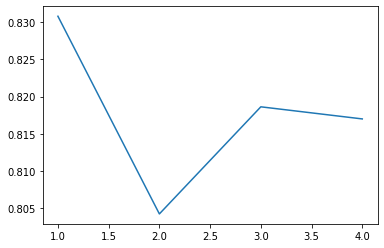

In [24]:
plt.plot(range(1,5),k_scores)
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier

#SHAMIEL
def load_the_data(file):
    return np.load(file,mmap_mode='r',allow_pickle=False, fix_imports=True, encoding='ASCII')['arr_0']


train_images = load_the_data("k49-train-imgs.npz")
train_label = load_the_data("k49-train-labels.npz")
test_images = load_the_data("k49-test-imgs.npz")
test_label = load_the_data("k49-test-labels (1).npz")

# i decided to work with a smaller training set(due to limited hardware)
train_images = train_images[:32000]
train_label = train_label[:32000]

test_images = test_images[:8000]
test_label = test_label [:8000]

train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

#PCA -> reduce the dimensionality(reduce computation complexity)

pca = PCA(n_components= 60, random_state= 0)
pca.fit_transform(train_images)
pca.transform(test_images)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_images,train_label)
#y_prediction = knn.predict(test_images)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [85]:
y_prediction = knn.predict(test_images)

In [86]:
from sklearn.metrics import classification_report
accs = results(test_label,y_prediction)
print(accs*100)

print(classification_report(test_label,y_prediction))

73.01552130087966
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       220
           1       0.90      0.87      0.89       213
           2       0.71      0.91      0.80       222
           3       0.53      0.69      0.60        26
           4       0.84      0.78      0.81       201
           5       0.65      0.63      0.64       208
           6       0.87      0.75      0.80       206
           7       0.73      0.76      0.75       226
           8       0.67      0.73      0.70       162
           9       0.78      0.75      0.77       189
          10       0.86      0.69      0.76       223
          11       0.56      0.84      0.67       207
          12       0.74      0.64      0.69       191
          13       0.90      0.61      0.73       136
          14       0.82      0.56      0.66       122
          15       0.69      0.73      0.71       196
          16       0.66      0.90      0.76        98
         

Text(452.78000000000003, 0.5, 'true value')

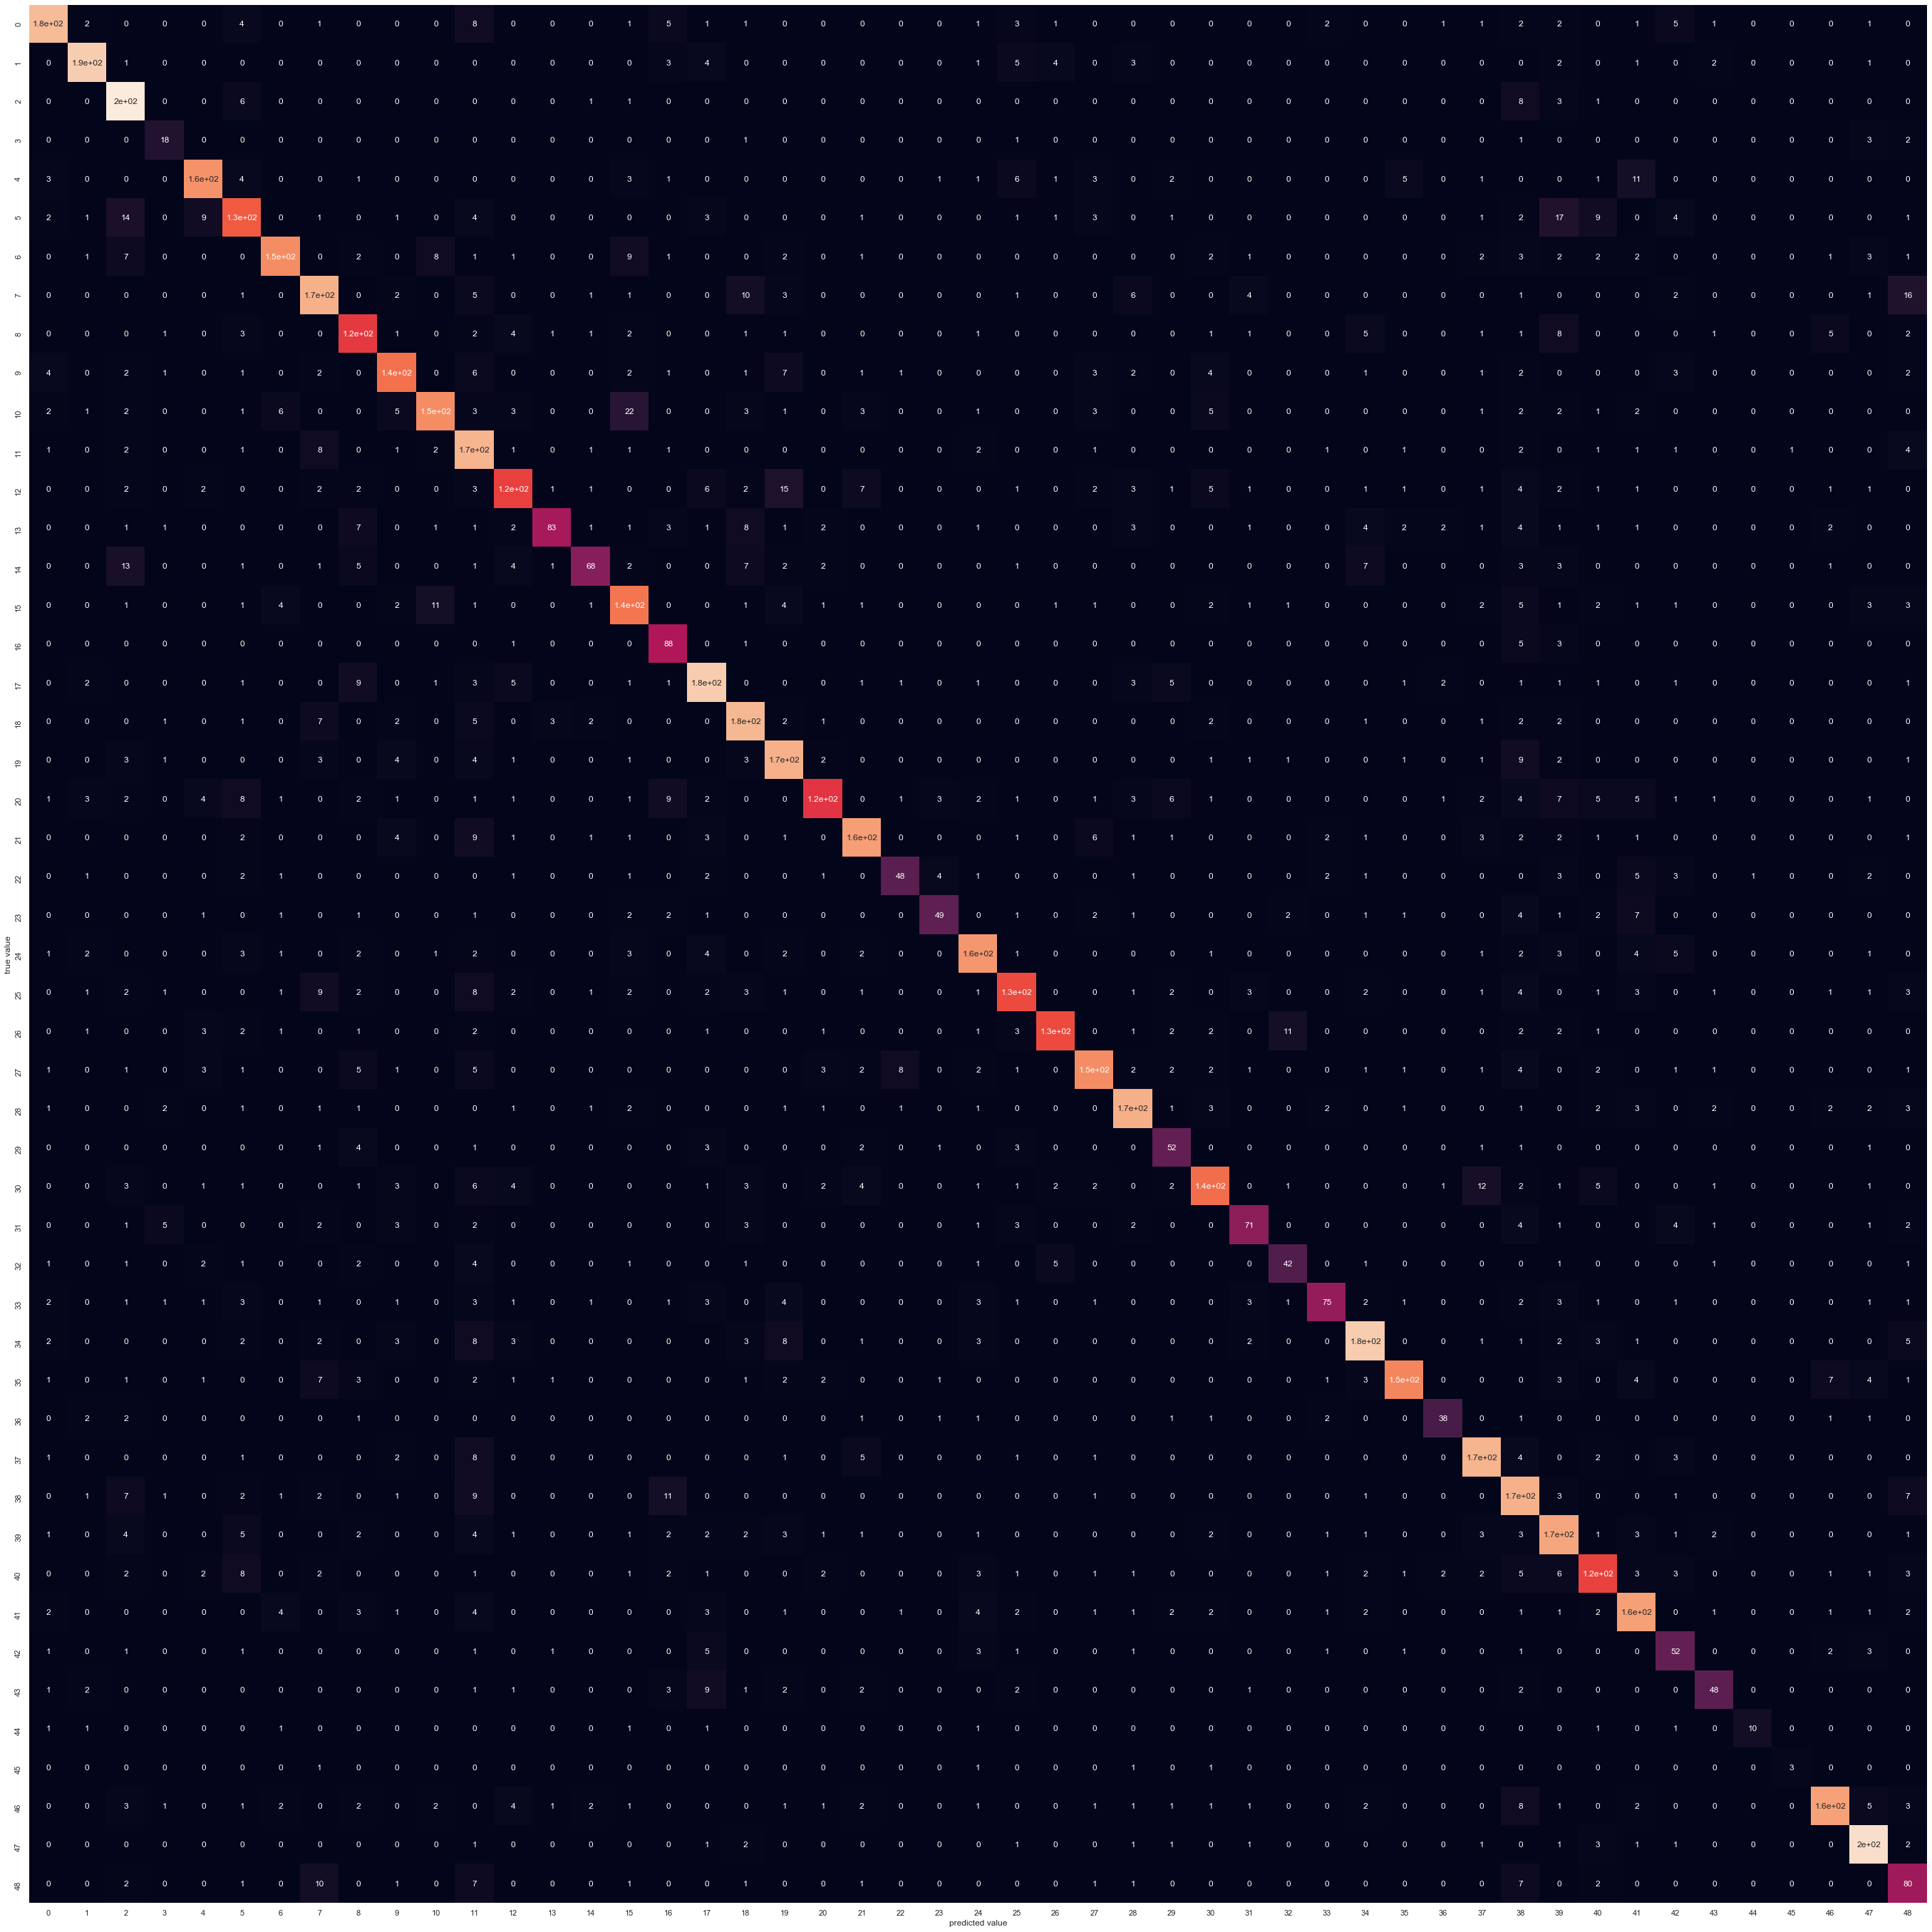

In [87]:
# for KNN
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


cm = confusion_matrix(test_label,y_prediction)
plt.figure(figsize=(49,49))
#plot_confusion_matrix(mat,class_name)
#here seaborn is used for this larger confusion matrix
sns.heatmap(cm, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

f1 = f1_score(test_label,y_prediction,average='micro')
precision = precision_score(test_label,y_prediction,average='micro')
recall = recall_score(test_label,y_prediction,average='micro')

print(f1,precision,recall)

0.7545000000000001 0.7545 0.7545
